## Here I use the premade modules to 
* read in, clean and 
* transform the raw input data. 

I do this for the universal model with 35 assets and the individual five models. I create training and test sets for 3 different time intervals.

**The output should be a suitable input for a tensorflow CNN model.**

## 0. Dependencies
<a id = 'sec1'></a>

In [1]:
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))



Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#custom library
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/CNN/evaluation')
from gramian_angular_field import GASF, GADF
from recurrence_plot import RP
from markov_transition_field import MTF

### Decide hyperparameters of transformation

In [0]:
image_window_sizes = [10, 20, 30, 40, 50, 100, 200]


#times
t0 = []
t1 = []
mean_times = []

image_cr = pd.DataFrame(columns = ["10", "20", "30", "40", "50", "100", "200"])

In [0]:
for image_window_size in image_window_sizes:
  for count in range(1000):
    data = np.random.normal(size = image_window_size + 1)  
    t0.append(time.time())

    returndata = data[1:]/data[:-1] -1

    images_RP, serie_RP = RP(
                    returndata, image_window_size, standardize_out=True, padding = 1)
    images_RP = np.array(images_RP)

    images_GASF,  phi_GASF, r_GASF, scaled_ts_GASF, ts_GASF = GASF(
                    returndata, image_window_size, standardize_out=True)
    images_GASF = np.array(images_GASF)

    images_MTF, binned_serie_MTF, serie_MTF = MTF(
                    returndata, window_size = image_window_size, num_bin = 5)
    images_MTF = np.array(images_MTF) 


    t1.append(time.time())
  
  mean_times.append(np.mean(np.array(t1)-np.array(t0)))
  t0 = []
  t1 = []

## Average Time

In [0]:
mean_times = np.array(mean_times)*1000

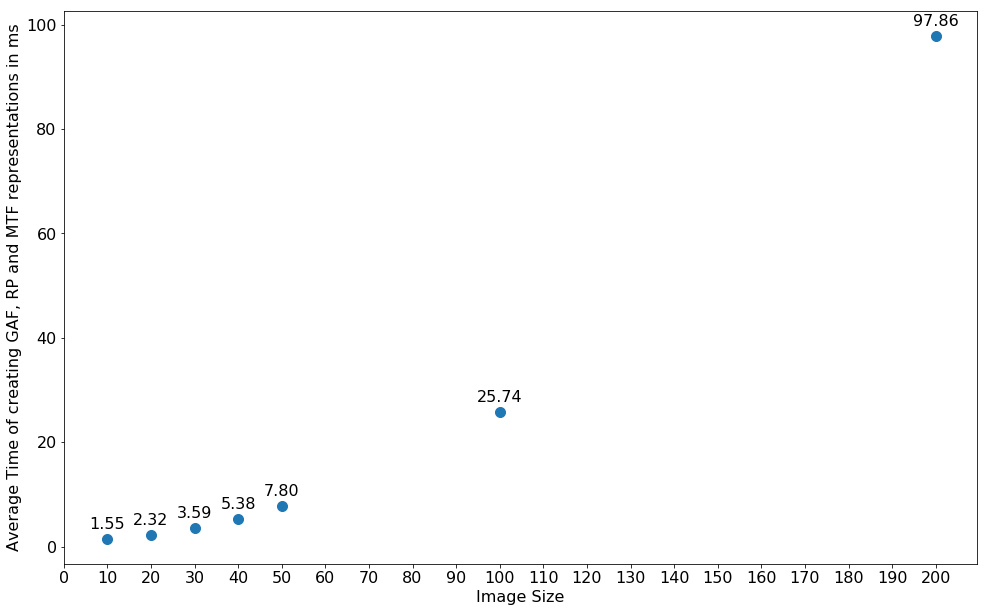

In [9]:
plt.figure(figsize=[14,9])
plt.rcParams.update({'font.size': 16})
plt.plot(image_window_sizes, mean_times, 'o', markersize = 10)
plt.xlabel("Image Size")
plt.ylabel("Average Time of creating GAF, RP and MTF representations in ms")

for x,y in zip(image_window_sizes, mean_times):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    plt.xticks(np.arange(0,210,10))
plt.tight_layout()
plt.savefig("drive/My Drive/Colab Notebooks/CNN/Results/Image_Trf_Times.png")